In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import loaders
import warnings
from lightkurve import LightkurveWarning
warnings.filterwarnings("ignore", category=LightkurveWarning)
import math
%load_ext autoreload
%autoreload 2
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
def calc_mstat(flux):
    avg = np.nanmedian(flux)
    # print('avg ' + str(avg))
    stdev = np.nanstd(flux)
    # print('stdev ' + str(stdev))

    orderflux = np.sort(flux)
    num = len(orderflux)
    # Get top and bottom deciles of the lightcurve data:
    extremeup = orderflux[0:int(np.round(0.1*num))]
    #print(len(extremeup), extremeup)
    extremedown = orderflux[int(np.round(0.9*num)):num-1]
    #print(len(extremedown), extremedown)    
    extreme = np.append(extremeup,extremedown)
    #print(len(extreme), extreme)
    
    #print(avg, np.mean(extreme), stdev)
    diff = (avg-np.mean(extreme))/stdev
    return diff

def plot_mstat_depth(shape):
    mstats = np.array([])
    depths = np.array([])
    df_save2 = pd.DataFrame()
    df_save = pd.DataFrame()   

    if shape == 'Triangle':
        image_ratios = np.array([0.07, 0.16, 0.25, 0.34, 0.43, .49]) # triangles
    else:
        image_ratios = np.array([0.07, 0.16, 0.25, 0.34, 0.43, 0.52, 0.61, 0.70, 0.79, 0.88, 0.97, .99])


    #image_ratios = image_ratios + .02
    iteration = 0

    df_save = pd.DataFrame()

    #for vertices in range(3,4):
    #for ratio in range(1,11):
    for image_ratio in image_ratios:
    #for ratio in (1,1.2,1.4,1.6,1.8,2): #>=1
        if shape == 'Triangle':
            ratio = 1/ np.sqrt(1- 2*image_ratio) #triangle
        else:
            ratio = 1/ np.sqrt(1- image_ratio) #circ/square
        iteration +=1


        print("ratio " + str(image_ratio))
        df = pd.read_csv(#'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(shape) + '/' +str(shape) + '_ratio_'+ str(ratio)+'_velocity_0.6.csv'
                         '/home/jupyter/SPOcc/spocc/notebooks/Injected_LCs_tic272759551/' +str(shape) + '_ratio_'+ str(ratio)+'_velocity_0.6.csv'
                         #'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(vertices) + '/ratio_'+ str(ratio)+ '.csv'
                        )
        flux = df['Flux'].values
        time = df['Time'].values

        df_save['Flux' + str(iteration)] = flux


        #plt.ylim(0,1.1)

        #plt.plot(time, flux, label='ratio' + str(ratio), color='grey')

        #plt.legend(loc='upper left')

        mstat = calc_mstat(flux)
        mstats = np.append(mstats, mstat)

        depth = np.min(flux[:-200])
        print('min ' +str(depth))
        depths = np.append(depths, depth)
        print("mstat: " + str(mstat) +"\n")
        #plt.show()

    #print(mstats)    

    #print('flux = flux[800:930] time = time[800:930]')
    #plt.plot(lc.time.value- lc.time.value[0], lc.flux.value, color = 'black')
    #plt.title(str(shape) + 's', fontsize = 14)    
    #plt.xlabel('Time [d]', fontsize = 14)
    #plt.ylabel('Normalized Flux', fontsize = 14)
    #plt.ylim(0,1.1)
    #plt.show()
    plt.xlabel('Minimum Normalized Flux Stat', fontsize = 14)
    plt.ylabel('M', fontsize = 14)
    #plt.title(shape, fontsize = 14)
    plt.scatter(depths, mstats, label = str(shape))
    plt.legend()
    #plt.show()


    #list_of_tuples = list(zip(time, flux, depths, mstats))
    df_save['Time'] = time
    #df_save2[['Depths', 'Mstats']] = depths, mstats
    df_save2 = pd.DataFrame({'Depths':depths, 'Mstats':mstats})
    df_save = pd.concat([df_save, df_save2], axis=1) 

    #print(df_save)
    #mstat_s = mstats
    #depths_s = depths

    os.makedirs('subplot_data_tic251630511',exist_ok=True)
    df_save.to_csv('./subplot_data_tic251630511/' + str(shape) + '_depth_spike.csv', index=False)

def find_width(shape, ratio):
    widths = np.array([])
    velocities = np.array([])
    #ratio = 1/ np.sqrt(1- ratio) #circle/square

    #for vertices in range(3,4):
    #for velocity in (.6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6): #
    for velocity in (.3, .4 , .5, .7, 1.0, 1.8): #.9, 1.0, 1.2, 1.4, 1.6, 1.8): #

        df = pd.read_csv('/home/jupyter/SPOcc/spocc/notebooks/Random_LCs/Class_' + str(shape) + '/' +str(shape) + '_ratio_'+str(ratio)+'_velocity_' + str(velocity)+ '.csv'
                         #'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(vertices) + '/ratio_'+ str(ratio)+ '.csv'
                        )
        flux = df['Flux'].values
        time = df['Time'].values


        #plt.plot(time, flux,label='velocity' +str(velocity), color = 'grey')


        nonzero_indices = df.index[flux != 1]
        first_nonzero_index = nonzero_indices[0]
        last_nonzero_index = nonzero_indices[-1]
        width = df.loc[last_nonzero_index, 'Time'] - df.loc[first_nonzero_index, 'Time']

        widths = np.append(widths, width)
        velocities = np.append(velocities, velocity)



    #plt.legend(loc='lower left')
    # plt.title(str(shape) + 's')  
    # plt.ylabel('Normalized Flux', fontsize = '14')
    # plt.xlabel('Time [d]', fontsize = '14')
    # plt.show()
    # plt.xlabel('widths (days)', fontsize = '14')
    # plt.ylabel('velocities', fontsize = '14')
    # plt.scatter(widths, velocities)
    ##plt.show()
    widths = widths
    print(widths)
    print(velocities)
    return widths

def plot_mstat_width(shape, ratio, widths):
    velocities = np.array([])
    ratio = ratio
    mstats = np.array([])
    df_save2 = pd.DataFrame()
    df_save = pd.DataFrame()    
    iteration = 0


    #for vertices in range(3,4):
    #for velocity in (.6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6): #
    #for velocity in (.6,  1.0,  1.4,  1.8,  2.2,  2.6): #
    for velocity in (.3, .4 , .5, .7, 1.0, 1.8): #.9, 1.0, 1.2, 1.4, 1.6, 1.8): #


        df = pd.read_csv('/home/jupyter/SPOcc/spocc/notebooks/Injected_LCs_tic272759551/' +str(shape) + '_ratio_'+ str(ratio)+'_velocity_' + str(velocity)+ '.csv'
                         #'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(vertices) + '/ratio_'+ str(ratio)+ '.csv'
                        )
        flux = df['Flux'].values
        time = df['Time'].values
        iteration +=1


        #plt.plot(time, flux,label='velocity' +str(velocity))#, color = 'grey')


        mstat = calc_mstat(flux)
        mstats = np.append(mstats, mstat)

        df_save['Flux' + str(iteration)] = flux


    df_save['Time'] = time
    #df_save2[['Depths', 'Mstats']] = depths, mstats
    df_save2 = pd.DataFrame({'Widths':widths, 'Mstats':mstats})
    df_save = pd.concat([df_save, df_save2], axis=1)     



    #plt.legend(loc='lower left')
    #plt.title(str(shape) + 's')  
    #plt.ylabel('Normalized Flux', fontsize = '14')
    #plt.xlabel('Time [d]', fontsize = '14')
    #plt.show()
    plt.xlabel('Widths [days]', fontsize = '14')
    plt.ylabel('M', fontsize = '14')
    plt.scatter(widths, mstats, label = str(shape))
    plt.legend()
    #plt.show()


    os.makedirs('subplot_data_tic251630511',exist_ok=True)
    df_save.to_csv('./subplot_data_tic251630511/' + str(shape) + '_width_spike.csv', index=False)


ratio 0.07
min 0.5158829184636797
mstat: 1.3940987413650159

ratio 0.16
min 0.5819742694956342
mstat: 1.3645931010650985

ratio 0.25
min 0.6594358324528893
mstat: 1.3080895139671755

ratio 0.34
min 0.7538230254228679
mstat: 1.2002289278423566

ratio 0.43
min 0.8632449169950139
mstat: 0.8961110797789005

ratio 0.49
min 0.9381004839998046
mstat: 0.30488776532273576



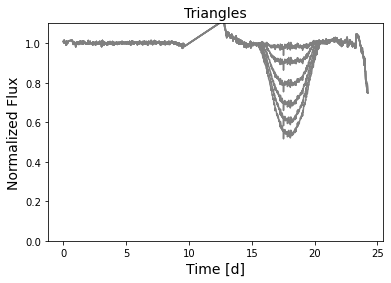

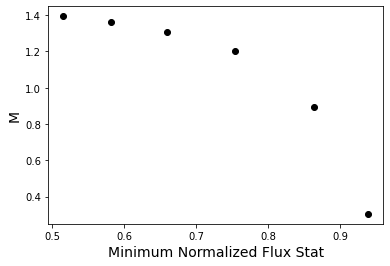

        Flux1     Flux2     Flux3     Flux4     Flux5     Flux6       Time  \
0    1.008330  1.008330  1.008330  1.008330  1.008330  1.008330   0.000000   
1    1.003863  1.003863  1.003863  1.003863  1.003863  1.003863   0.020833   
2    1.001899  1.001899  1.001899  1.001899  1.001899  1.001899   0.041666   
3    1.014658  1.014658  1.014658  1.014658  1.014658  1.014658   0.062499   
4    1.003636  1.003636  1.003636  1.003636  1.003636  1.003636   0.083333   
..        ...       ...       ...       ...       ...       ...        ...   
984  0.775829  0.775829  0.775829  0.775829  0.775829  0.775829  24.145586   
985  0.751745  0.751745  0.751745  0.751745  0.751745  0.751745  24.166419   
986  0.794775  0.794775  0.794775  0.794775  0.794775  0.794775  24.187252   
987  0.748888  0.748888  0.748888  0.748888  0.748888  0.748888  24.208085   
988  0.748802  0.748802  0.748802  0.748802  0.748802  0.748802  24.228918   

       Depths    Mstats  
0    0.515883  1.394099  
1    0.5819

In [13]:
#Mstat for depths
shape = 'Triangle'
vertices = 11

plot_mstat_depth(shape)

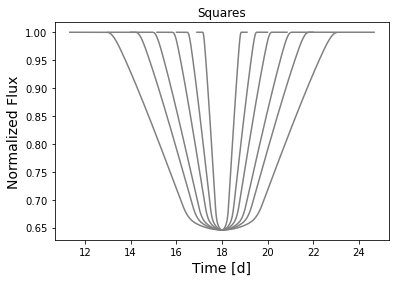

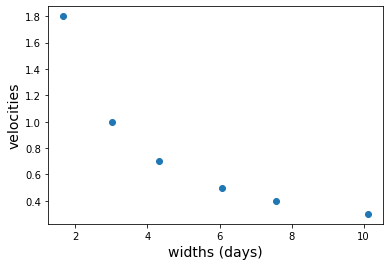

[10.11196911  7.56833977  6.06718147  4.31583012  3.02316602  1.66795367]
[0.3 0.4 0.5 0.7 1.  1.8]


FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/SPOcc/spocc/notebooks/Injected_LCs/tic272759551/Square_ratio_2_velocity_2.2.csv'

In [27]:
# Mstats for widths
shape = 'Square' 
ratio = 2 #triangles ratio 1.4, other ratio 2

widths = find_width(shape, ratio)
plot_mstat_width(shape, ratio, widths)

In [9]:
#ref = loaders.load_ref(18, "/mnt/disks/lcs/tess-goddard-lcs/")

data_dir = "/home/jupyter/mountpoint/"  # path for bucket

ref = loaders.load_ref(18, data_dir) #sector 18 camera 2

subref = ref[ref.TIC_ID.isin([232615474])]#377199128 # overplot with this anomalous
lcc = loaders.LightCurveCollection(subref)
lc = lcc.load_cut_lc(lcc[0])
print(lc)
plt.plot(lc.time.values, lc.flux.values)

       time               flux             flux_err      quality
                                                                
------------------ ------------------ ------------------ -------
1790.6767428926423 1.0015341614877622  1.406499881599456       0
 1790.697576194748  0.989205937314717 1.4132495594693988       0
1790.7184094980248 0.9955108391371043 1.4030835869332245       0
1790.7392428023713 0.9860754544755206  1.404352167296788       0
1790.7600761076653 1.0042495761263495 1.4062110724282766       0
 1790.780909413771  0.993693331805233  1.410369230447175       0
 1790.801742720542 0.9939422763386427 1.4013197247014628       0
1790.8225760278197 1.0087433742000707 1.4024290282991796       0
1790.8434093354392 1.0029960829202271  1.402695716152301       0
1790.8642426432332 0.9923900305487169 1.4033526566013288       0
               ...                ...                ...     ...
1814.6767661952822 1.2832372351914652 2.2836270045066986       0
1814.6975996131068 1.3205

AttributeError: 'Time' object has no attribute 'values'

In [ ]:
from extern import features
features.feats(noise['Time'].values, noise['Flux'].values, noise['Flux_err'].values)


ratio 0.07
min 0.0012056106351838734
mstat: 1.4380773421178887

ratio 0.16
min 0.029773292133689174
mstat: 1.4436079796865722

ratio 0.25
min 0.08315980685153346
mstat: 1.447997255292576

ratio 0.34
min 0.1457901240120696
mstat: 1.4505037102290774

ratio 0.43
min 0.2294094523257181
mstat: 1.4509130623111084

ratio 0.52
min 0.3301761276929737
mstat: 1.4468309824160877

ratio 0.61
min 0.44727323797598695
mstat: 1.4321649549645488

ratio 0.7
min 0.5587811265318097
mstat: 1.4012258448498456

ratio 0.79
min 0.6855671839390831
mstat: 1.3293646979736127

ratio 0.88
min 0.8140347367162338
mstat: 1.1909895975186127

ratio 0.97
min 0.940800449085442
mstat: 0.9282165339643405

ratio 0.99
min 0.9704621375202276
mstat: 0.8457897081735073

ratio 0.07
min 0.0277892818166674
mstat: 1.4627258463838486

ratio 0.16
min 0.10030847033798862
mstat: 1.465256154307992

ratio 0.25
min 0.1835939677958307
mstat: 1.4642345457527826

ratio 0.34
min 0.2674718160418341
mstat: 1.4612124989509225

ratio 0.43
min 0.357

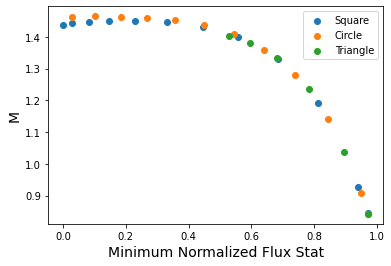

In [46]:
#Mstat for depths
shape = 'Triangle'
vertices = 11

plot_mstat_depth('Square')
plot_mstat_depth('Circle')
plot_mstat_depth('Triangle')
#velocity 0.6

[10.11196911  7.56833977  6.06718147  4.31583012  3.02316602  1.66795367]
[0.3 0.4 0.5 0.7 1.  1.8]
[10.11196911  7.56833977  6.06718147  4.31583012  3.02316602  1.66795367]
[0.3 0.4 0.5 0.7 1.  1.8]
[10.02857143  7.50579151  6.0046332   4.29498069  3.0023166   1.64710425]
[0.3 0.4 0.5 0.7 1.  1.8]


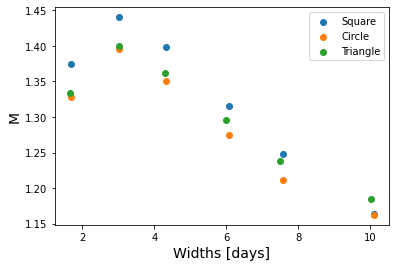

In [45]:
widths = find_width('Square', 2)
plot_mstat_width('Square', 2, widths)
widths = find_width('Circle', 2)
plot_mstat_width('Circle', 2, widths)
widths = find_width('Triangle', 1.4)
plot_mstat_width('Triangle', 1.4, widths)